In [69]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [70]:
# Load data sets.

itemDf = pd.read_csv("../Data/item.csv")
promotionDf = pd.read_csv("../Data/promotion.csv")
salesDf = pd.read_csv("../Data/sales.csv")
supermarketsDf = pd.read_csv("../Data/supermarkets.csv")

In [71]:
salesDf

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048099,1510000011,2.35,1,1307,2,27,43825,346,665448,189,0
1048100,3620000489,0.99,1,1307,2,27,43825,346,665448,189,0
1048101,9999971309,2.00,2,1410,2,27,42140,346,665449,189,0
1048102,3620000250,1.98,2,1415,2,27,53544,346,665450,189,0


In [72]:
promotionDf

,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2
3,2700042273,285,92,Interior Page Feature,Not on Display,2
4,2700042254,285,92,Interior Page Feature,Not on Display,2
...,...,...,...,...,...,...
351367,9999966721,387,101,Wrap Front Feature,Not on Display,1
351368,9999966720,387,101,Wrap Front Feature,Not on Display,1
351369,3620000507,387,104,Interior Page Feature,Not on Display,1
351370,3620000493,387,104,Interior Page Feature,Not on Display,1


In [73]:
grouped_salesDf = salesDf.groupby(['code', 'province']).agg({
    'amount': 'sum',
    'units': 'sum'
}).reset_index()

In [74]:
grouped_salesDf

,code,province,amount,units
0,111112360,1,74.67,13
1,566300023,1,103.39,31
2,566300028,1,1023.93,367
3,566300029,1,1.49,1
4,566300035,1,17.52,8
...,...,...,...,...
1192,9999985260,2,5604.81,4065
1193,9999985488,1,737.13,303
1194,9999985488,2,494.35,183
1195,9999985766,1,880.17,406


In [75]:
def mode_function(x):
    return x.mode()[0] if not x.mode().empty else None

grouped_promotionDf = promotionDf.groupby(['code', 'province']).agg({
    'feature': mode_function,
    'display': mode_function
}).reset_index()

In [76]:
grouped_promotionDf

,code,province,feature,display
0,601011292,1,Interior Page Feature,Not on Display
1,601011292,2,Interior Page Feature,Not on Display
2,601011293,1,Interior Page Feature,Not on Display
3,601011293,2,Interior Page Feature,Not on Display
4,601011294,1,Not on Feature,Secondary Location Display
...,...,...,...,...
763,9999985260,2,Interior Page Feature,Not on Display
764,9999985488,1,Not on Feature,Rear End Cap
765,9999985488,2,Not on Feature,Mid-Aisle End Cap
766,9999985766,1,Not on Feature,In-Shelf


In [77]:
merged_df = pd.merge(grouped_salesDf, grouped_promotionDf, on=['code', 'province'], how='inner')

In [78]:
merged_df

,code,province,amount,units,feature,display
0,601011292,1,4780.98,2367,Interior Page Feature,Not on Display
1,601011292,2,4245.54,1632,Interior Page Feature,Not on Display
2,601011293,1,3372.91,1675,Interior Page Feature,Not on Display
3,601011293,2,119.80,46,Interior Page Feature,Not on Display
4,601011294,1,2.49,1,Not on Feature,Secondary Location Display
...,...,...,...,...,...,...
659,9999985260,2,5604.81,4065,Interior Page Feature,Not on Display
660,9999985488,1,737.13,303,Not on Feature,Rear End Cap
661,9999985488,2,494.35,183,Not on Feature,Mid-Aisle End Cap
662,9999985766,1,880.17,406,Not on Feature,In-Shelf


## Effect of Display

In [79]:
merged_df['display'] = merged_df['display'].replace({'Front End Cap': 'High Visibility', 
                                                     'Store Front': 'High Visibility', 
                                                     'Promo/Seasonal Aisle': 'High Visibility',
                                                     'Mid-Aisle End Cap': 'Medium Visibility', 
                                                     'Secondary Location Display': 'Medium Visibility', 
                                                     'Side-Aisle End Cap': 'Medium Visibility',
                                                     'Rear End Cap': 'Medium Visibility', 
                                                     'Not on Display': 'Low Visibility', 
                                                     'In-Shelf': 'Low Visibility',
                                                     'Store Rear': 'Low Visibility', 
                                                     'In-Aisle': 'Low Visibility'
                                                     })

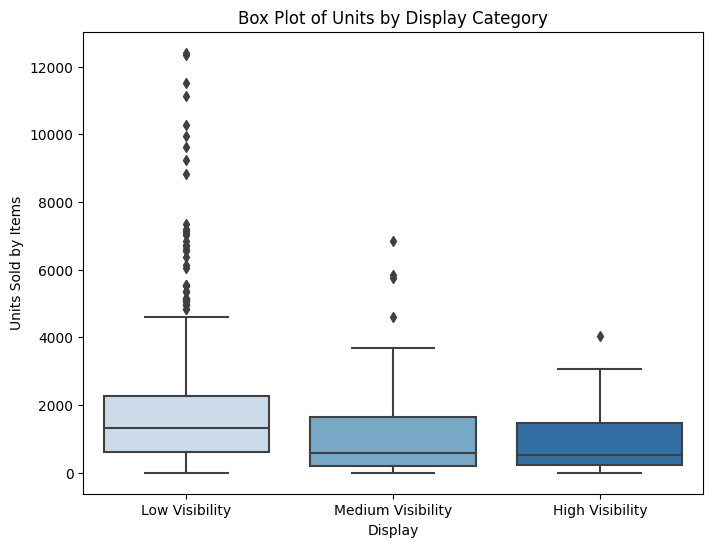

In [80]:
category_order = ['Low Visibility', 'Medium Visibility', 'High Visibility']

# Create a blue color palette
blue_palette = sns.color_palette("Blues", 3)

# Create a box plot for 'units' categorized by 'display' with specific order and palette
plt.figure(figsize=(8, 6))
sns.boxplot(x='display', y='units', data=merged_df, order=category_order, palette=blue_palette)
plt.title('Box Plot of Units by Display Category')
plt.xlabel('Display')
plt.ylabel('Units Sold by Items')
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


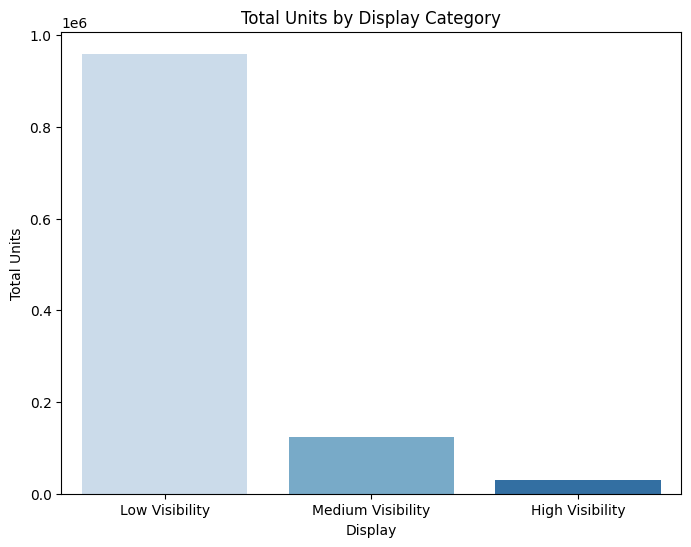

In [81]:
total_units = merged_df.groupby('display')['units'].sum().reset_index()

# Sort the DataFrame by the category order for 'display'
total_units['display'] = pd.Categorical(total_units['display'], categories=category_order, ordered=True)
total_units = total_units.sort_values('display')

# Create a bar plot for total units by display category with specific order and palette
plt.figure(figsize=(8, 6))
sns.barplot(x='display', y='units', data=total_units, palette=blue_palette)
plt.title('Total Units by Display Category')
plt.xlabel('Display')
plt.ylabel('Total Units')
plt.show()

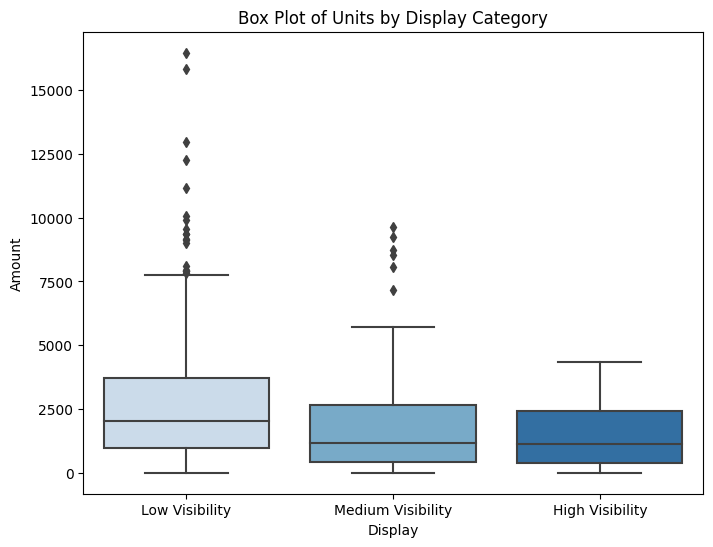

In [82]:
# Create a box plot for 'units' categorized by 'display' with specific order and palette
plt.figure(figsize=(8, 6))
sns.boxplot(x='display', y='amount', data=merged_df, order=category_order, palette=blue_palette)
plt.title('Box Plot of Units by Display Category')
plt.xlabel('Display')
plt.ylabel('Amount')
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


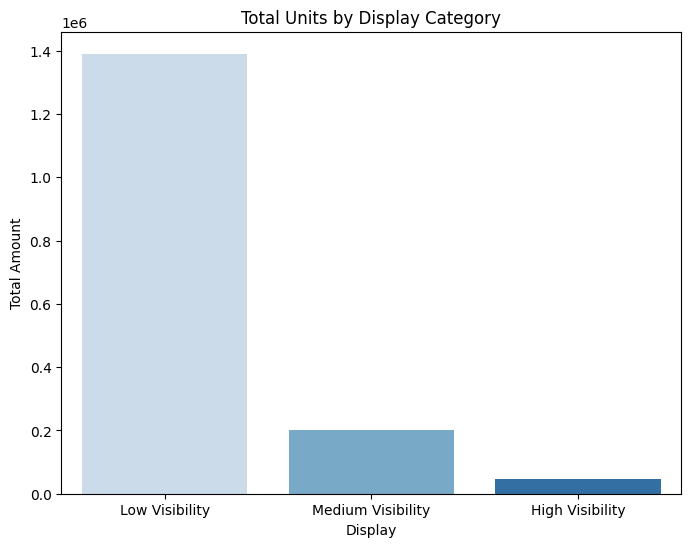

In [83]:
total_units = merged_df.groupby('display')['amount'].sum().reset_index()

# Sort the DataFrame by the category order for 'display'
total_units['display'] = pd.Categorical(total_units['display'], categories=category_order, ordered=True)
total_units = total_units.sort_values('display')

# Create a bar plot for total units by display category with specific order and palette
plt.figure(figsize=(8, 6))
sns.barplot(x='display', y='amount', data=total_units, palette=blue_palette)
plt.title('Total Units by Display Category')
plt.xlabel('Display')
plt.ylabel('Total Amount')
plt.show()

### Hypothesis 01 and 02

##### Displaying products at High visible places will lead to higher unit sales and amount compared to displaying them at the Medium or Low visible places.

In [84]:
control_group = merged_df[(merged_df['display'] == 'Low Visibility') | (merged_df['display'] == 'Medium Visibility')]
test_group = merged_df[merged_df['display'] == 'High Visibility']  # High visible of Shop

In [85]:
# Summarize the data to compare average sales and units sold
control_summary = control_group[['amount', 'units']].mean()
test_summary = test_group[['amount', 'units']].mean()

print("Control Group Summary (Back/Not Displayed):")
print(control_summary)

print("\nTest Group Summary (Front Display):")
print(test_summary)

Control Group Summary (Back/Not Displayed):
amount    2520.278621
units     1715.250000
dtype: float64

Test Group Summary (Front Display):
amount    1445.300521
units      945.937500
dtype: float64


In [86]:
# Perform a t-test for the amount (sales)
t_stat_amount, p_value_amount = stats.ttest_ind(test_group['amount'], control_group['amount'], equal_var=False)

# Perform a t-test for the units sold
t_stat_units, p_value_units = stats.ttest_ind(test_group['units'], control_group['units'], equal_var=False)

print(f"T-statistic for Amount: {t_stat_amount}, P-value: {p_value_amount}")
print(f"T-statistic for Units: {t_stat_units}, P-value: {p_value_units}")


T-statistic for Amount: -4.392798511588274, P-value: 7.40092656445272e-05
T-statistic for Units: -3.928320405829729, P-value: 0.0003162790144609478


In [87]:
t_stat_amount, p_value_amount = stats.ttest_ind(test_group['amount'], control_group['amount'], alternative='greater')

t_stat_units, p_value_units = stats.ttest_ind(test_group['units'], control_group['units'], alternative='greater')

print(f"T-statistic for Amount: {t_stat_amount}, P-value: {p_value_amount}")
print(f"T-statistic for Units: {t_stat_units}, P-value: {p_value_units}")

t_stat_amount, p_value_amount = stats.ttest_ind(test_group['amount'], control_group['amount'], alternative='less')

t_stat_units, p_value_units = stats.ttest_ind(test_group['units'], control_group['units'], alternative='less')

print(f"T-statistic for Amount: {t_stat_amount}, P-value: {p_value_amount}")
print(f"T-statistic for Units: {t_stat_units}, P-value: {p_value_units}")

T-statistic for Amount: -2.594100262346403, P-value: 0.9951531447558053
T-statistic for Units: -2.3673552689459316, P-value: 0.9908988342533169
T-statistic for Amount: -2.594100262346403, P-value: 0.004846855244194685
T-statistic for Units: -2.3673552689459316, P-value: 0.009101165746683137


### Hypothesis 03 and 04

##### Displaying products at Medium visible places will lead to higher unit sales and amount compared to displaying them at the Higher or Low visible places.

In [88]:
control_group = merged_df[(merged_df['display'] == 'Low Visibility') | (merged_df['display'] == 'High Visibility')]
test_group = merged_df[merged_df['display'] == 'Medium Visibility']  # Medium visible of Shop

In [89]:
# Summarize the data to compare average sales and units sold
control_summary = control_group[['amount', 'units']].mean()
test_summary = test_group[['amount', 'units']].mean()

print("Control Group Summary (Back/Not Displayed):")
print(control_summary)

print("\nTest Group Summary (Front Display):")
print(test_summary)

Control Group Summary (Back/Not Displayed):
amount    2579.974623
units     1776.592460
dtype: float64

Test Group Summary (Front Display):
amount    1888.035888
units     1165.850467
dtype: float64


In [90]:
# Perform a t-test for the amount (sales)
t_stat_amount, p_value_amount = stats.ttest_ind(test_group['amount'], control_group['amount'], equal_var=False)

# Perform a t-test for the units sold
t_stat_units, p_value_units = stats.ttest_ind(test_group['units'], control_group['units'], equal_var=False)

print(f"T-statistic for Amount: {t_stat_amount}, P-value: {p_value_amount}")
print(f"T-statistic for Units: {t_stat_units}, P-value: {p_value_units}")

T-statistic for Amount: -3.009742828495914, P-value: 0.0030483668633122635
T-statistic for Units: -3.923945031247665, P-value: 0.00012238746943317403


In [91]:
t_stat_amount, p_value_amount = stats.ttest_ind(test_group['amount'], control_group['amount'], alternative='greater')

t_stat_units, p_value_units = stats.ttest_ind(test_group['units'], control_group['units'], alternative='greater')

print(f"T-statistic for Amount: {t_stat_amount}, P-value: {p_value_amount}")
print(f"T-statistic for Units: {t_stat_units}, P-value: {p_value_units}")

t_stat_amount, p_value_amount = stats.ttest_ind(test_group['amount'], control_group['amount'], alternative='less')

t_stat_units, p_value_units = stats.ttest_ind(test_group['units'], control_group['units'], alternative='less')

print(f"T-statistic for Amount: {t_stat_amount}, P-value: {p_value_amount}")
print(f"T-statistic for Units: {t_stat_units}, P-value: {p_value_units}")

T-statistic for Amount: -2.8696508947117922, P-value: 0.9978798390315997
T-statistic for Units: -3.2380692538661466, P-value: 0.9993682426866544
T-statistic for Amount: -2.8696508947117922, P-value: 0.0021201609684002726
T-statistic for Units: -3.2380692538661466, P-value: 0.0006317573133455763


### Hypothesis 05 and 06

##### Displaying products at Low visible places will lead to higher unit sales and amount compared to displaying them at the Higher or Medium visible places.

In [92]:
control_group = merged_df[(merged_df['display'] == 'Medium Visibility') | (merged_df['display'] == 'High Visibility')]
test_group = merged_df[merged_df['display'] == 'Low Visibility']  # Low visible of Shop

In [93]:
# Summarize the data to compare average sales and units sold
control_summary = control_group[['amount', 'units']].mean()
test_summary = test_group[['amount', 'units']].mean()

print("Control Group Summary (Back/Not Displayed):")
print(control_summary)

print("\nTest Group Summary (Front Display):")
print(test_summary)

Control Group Summary (Back/Not Displayed):
amount    1786.111199
units     1115.223022
dtype: float64

Test Group Summary (Front Display):
amount    2649.135711
units     1827.222857
dtype: float64


In [94]:
t_stat_amount, p_value_amount = stats.ttest_ind(test_group['amount'], control_group['amount'], equal_var=False)

t_stat_units, p_value_units = stats.ttest_ind(test_group['units'], control_group['units'], equal_var=False)

print(f"T-statistic for Amount: {t_stat_amount}, P-value: {p_value_amount}")
print(f"T-statistic for Units: {t_stat_units}, P-value: {p_value_units}")

T-statistic for Amount: 4.374098063627126, P-value: 1.794608326911391e-05
T-statistic for Units: 5.140066305061044, P-value: 4.922340628090173e-07


In [95]:
t_stat_amount, p_value_amount = stats.ttest_ind(test_group['amount'], control_group['amount'], alternative='greater')

t_stat_units, p_value_units = stats.ttest_ind(test_group['units'], control_group['units'], alternative='greater')

print(f"T-statistic for Amount: {t_stat_amount}, P-value: {p_value_amount}")
print(f"T-statistic for Units: {t_stat_units}, P-value: {p_value_units}")

t_stat_amount, p_value_amount = stats.ttest_ind(test_group['amount'], control_group['amount'], alternative='less')

t_stat_units, p_value_units = stats.ttest_ind(test_group['units'], control_group['units'], alternative='less')

print(f"T-statistic for Amount: {t_stat_amount}, P-value: {p_value_amount}")
print(f"T-statistic for Units: {t_stat_units}, P-value: {p_value_units}")

T-statistic for Amount: 3.982996923350375, P-value: 3.7798290223996257e-05
T-statistic for Units: 4.1992520003329945, P-value: 1.5222444404438572e-05
T-statistic for Amount: 3.982996923350375, P-value: 0.999962201709776
T-statistic for Units: 4.1992520003329945, P-value: 0.9999847775555956
